In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/earthquake-dataset/earthquake_data.csv
/kaggle/input/earthquake-dataset/earthquake_1995-2023.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("/kaggle/input/earthquake-dataset/earthquake_data.csv")
df

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,13-01-2001 17:33,0,8,NaN,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",NaN,NaN
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,10-01-2001 16:02,5,7,NaN,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,NaN
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,09-01-2001 16:49,0,7,NaN,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",NaN,Vanuatu
780,"M 6.8 - Mindanao, Philippines",6.8,01-01-2001 08:54,0,5,NaN,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,"Mindanao, Philippines",NaN,NaN


In [4]:
df['tsunami'] = df['tsunami'].replace({1: True, 0: False})


/tmp/ipykernel_18/3491498382.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['tsunami'] = df['tsunami'].replace({1: True, 0: False})


In [5]:
data = df[['title','alert','tsunami','country','magnitude','nst','mmi','sig','depth']]
data

,title,alert,tsunami,country,magnitude,nst,mmi,sig,depth
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",green,True,Solomon Islands,7.0,117,7,768,14.000
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",green,False,NaN,6.9,99,4,735,25.000
2,M 7.0 -,green,True,Fiji,7.0,147,3,755,579.000
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",green,True,NaN,7.3,149,5,833,37.000
4,M 6.6 -,green,True,NaN,6.6,131,2,670,624.464
...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",NaN,False,NaN,7.7,427,8,912,60.000
778,"M 6.9 - 47 km S of Old Harbor, Alaska",NaN,False,NaN,6.9,0,7,745,36.400
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",NaN,False,Vanuatu,7.1,372,7,776,103.000
780,"M 6.8 - Mindanao, Philippines",NaN,False,NaN,6.8,64,5,711,33.000


In [6]:
cols = ['magnitude','nst','mmi','sig','depth']

Q1 = data[cols].quantile(0.1) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = data[cols].quantile(0.9)
IQR = Q3 - Q1

condition = ~((data[cols] < (Q1 - 1.5 * IQR)) | (data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

data_filtered = data[condition]

In [7]:
data_filtered.isnull().sum()
data_cleaned = data_filtered.dropna()
data_cleaned.isnull().sum()
data_sampled = data_cleaned

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


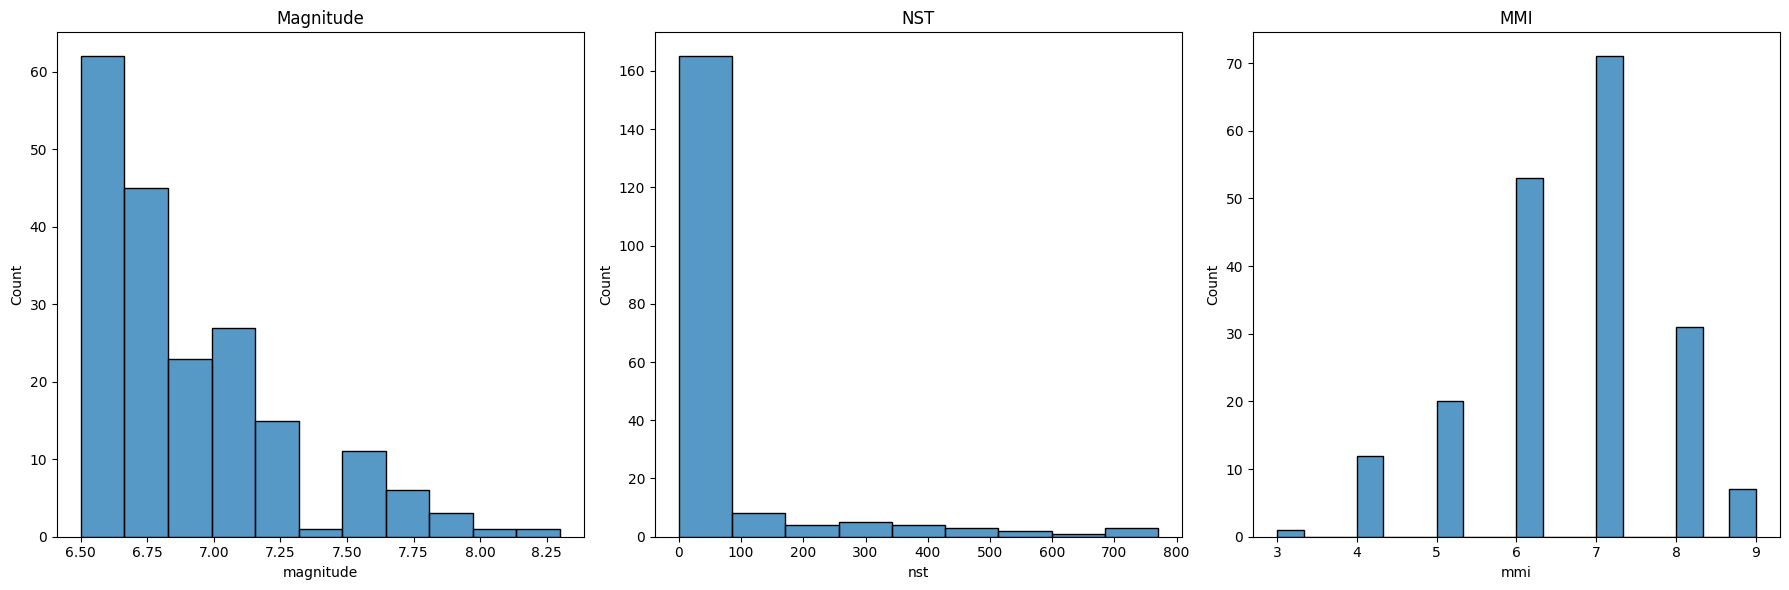

In [8]:
fig_hist, (ax_magnitude, ax_nst, ax_mmi) = plt.subplots(1, 3, figsize=(18, 6), dpi=100)

# Define the data and titles
plot_data = [('magnitude', ax_magnitude, "Magnitude"),
             ('nst', ax_nst, "NST"),
             ('mmi', ax_mmi, "MMI")]

# Plotting and setting titles in a loop
for data_col, axis, title in plot_data:
    sns.histplot(data=data_sampled, x=data_col, ax=axis)
    axis.set_title(title)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Depth')

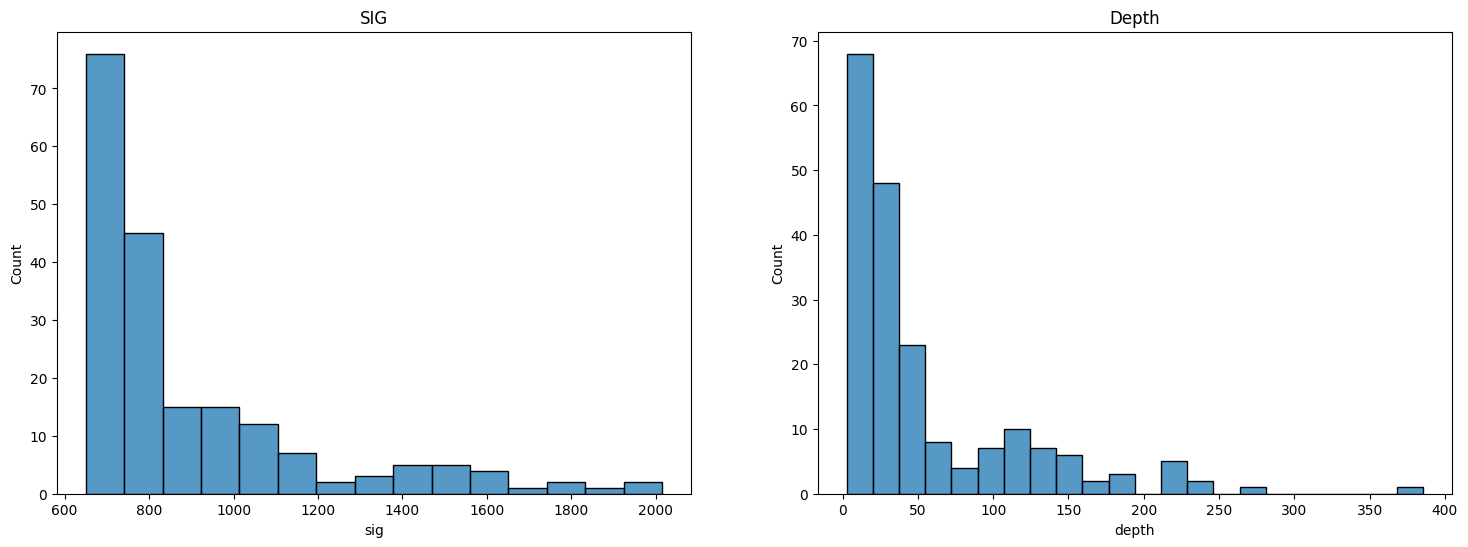

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=100)

sns.histplot(data = data_sampled, x = 'sig', ax=axes[0])
axes[0].set_title("SIG")

sns.histplot(data = data_sampled, x = 'depth', ax=axes[1])
axes[1].set_title("Depth")

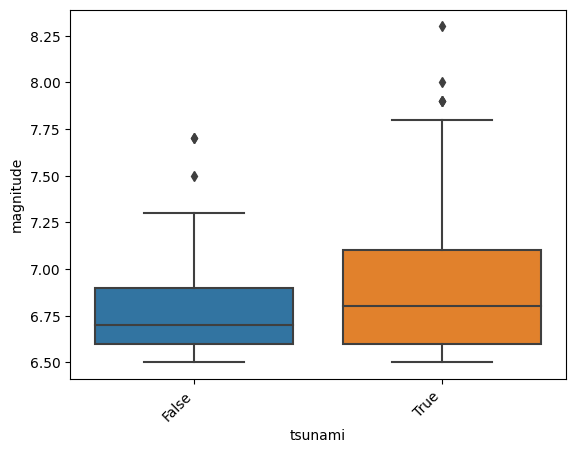

In [10]:
sns.boxplot(data=data_sampled,x='tsunami',y = 'magnitude')
plt.xticks(rotation=45,ha="right");

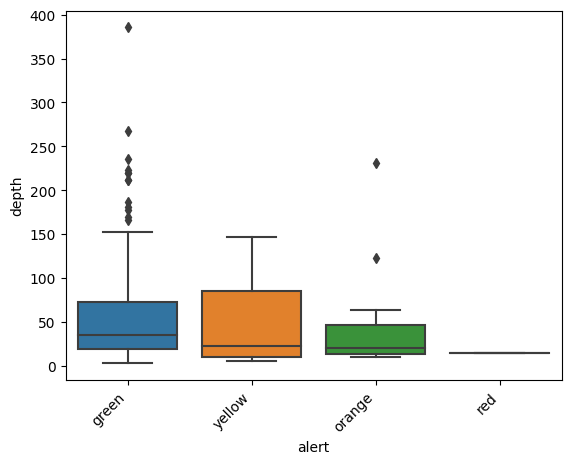

In [11]:
sns.boxplot(data=data_sampled,x='alert',y = 'depth')
plt.xticks(rotation=45,ha="right");

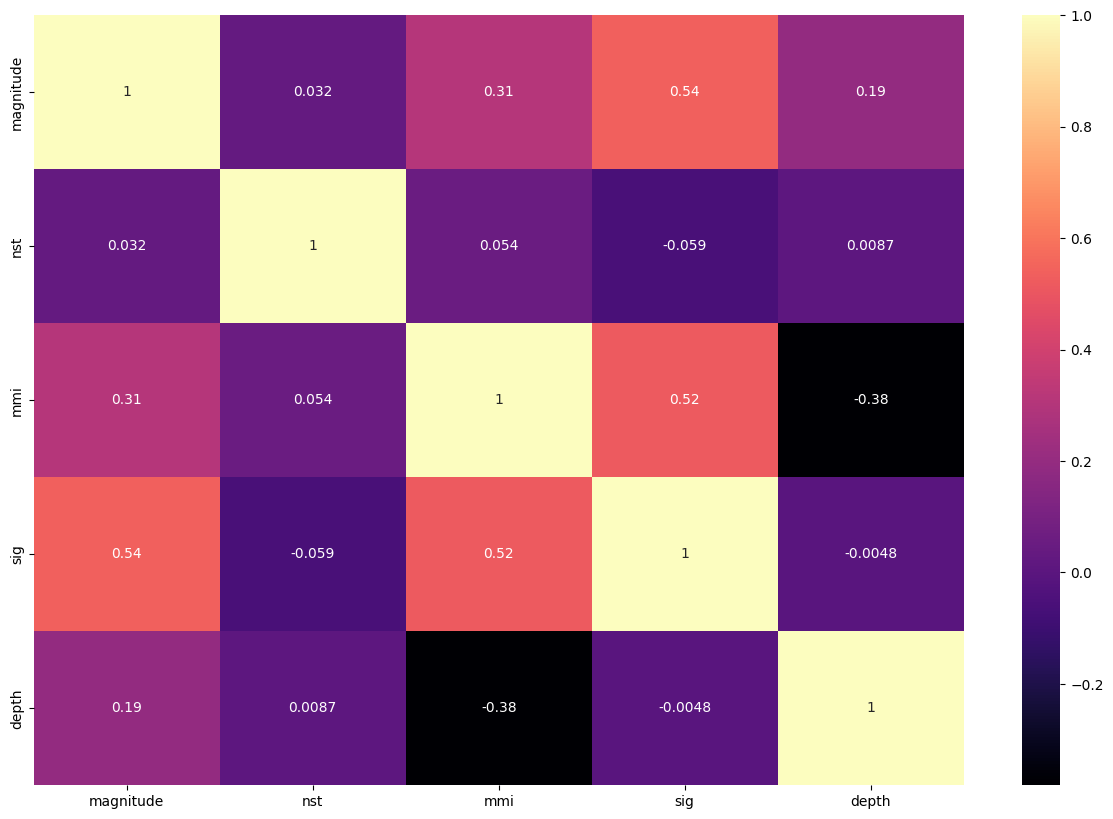

In [12]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_sampled[['magnitude','nst','mmi','sig','depth']].corr(), annot=True, linecolor='black', cmap='magma')
plt.show()

Text(0, 0.5, 'magnitude')

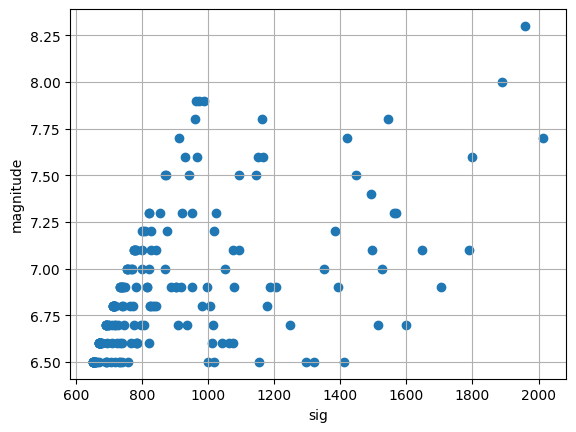

In [13]:
X=np.array(data_sampled.loc[:,'sig'].values.reshape(-1, 1)) 
Y=np.array(data_sampled.loc[:,'magnitude'].values.reshape(-1, 1)) 

plt.scatter(X, Y)
plt.grid()
plt.xlabel("sig")
plt.ylabel("magnitude")

In [14]:
linreg = LinearRegression()

linreg.fit(X, Y) 

print('a=',linreg.coef_[0][0])  
print('b=',linreg.intercept_[0]) 

Y_hat=linreg.predict(X)

a= 0.0006894344669968863
b= 6.276420957598918


In [15]:
erro=Y_hat-Y
df_estimado=pd.DataFrame(np.concatenate((X,Y,Y_hat,erro),axis=1), columns=['X','Y','Y_hat','Erro (e)'])
df_estimado

,X,Y,Y_hat,Erro (e)
0,768.0,7.0,6.805907,-0.194093
1,797.0,6.7,6.825900,0.125900
2,1179.0,6.8,7.089264,0.289264
3,1799.0,7.6,7.516714,-0.083286
4,887.0,6.9,6.887949,-0.012051
...,...,...,...,...
190,711.0,6.8,6.766609,-0.033391
191,691.0,6.7,6.752820,0.052820
192,754.0,7.0,6.796255,-0.203745
193,814.0,6.9,6.837621,-0.062379


Text(0, 0.5, 'Nota Final')

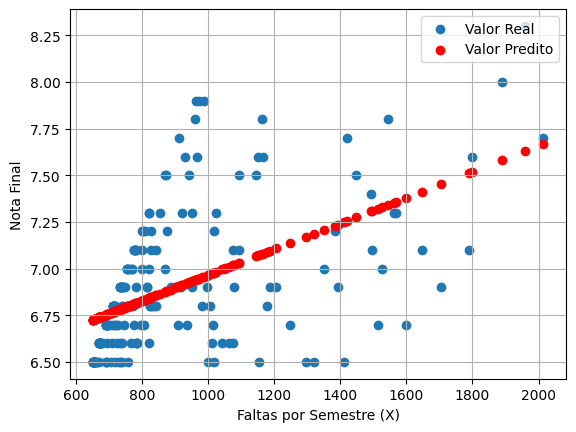

In [16]:
plt.scatter(X, Y, label='Valor Real')
plt.scatter(X, Y_hat,color='red',  label='Valor Predito')
plt.grid()
plt.legend(loc='upper right')

plt.xlabel("Faltas por Semestre (X)")
plt.ylabel("Nota Final")

Text(0, 0.5, 'Nota Final')

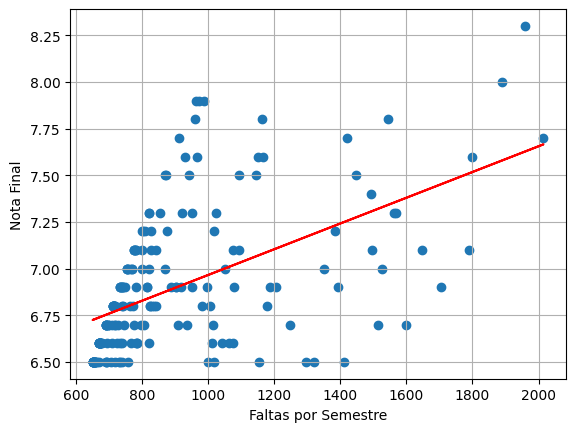

In [17]:
plt.scatter(X, Y)
plt.plot(X, Y_hat,color='red')
plt.grid()
plt.xlabel("Faltas por Semestre")
plt.ylabel("Nota Final")

In [18]:
print("MSE=",mean_squared_error(Y, Y_hat),", R^2=", r2_score(Y,Y_hat))

MSE= 0.09814279940833434 , R^2= 0.2887104990047129
